In [5]:
import pyforest 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=42)

In [3]:
type(X)

numpy.ndarray

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

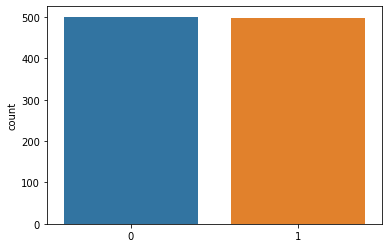

In [4]:
sns.countplot(y)

## Data Split

In [9]:
X.shape, y.shape

((1000, 20), (1000,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

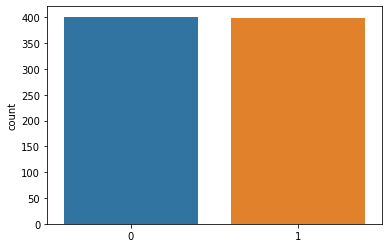

In [15]:
sns.countplot(y_train)

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

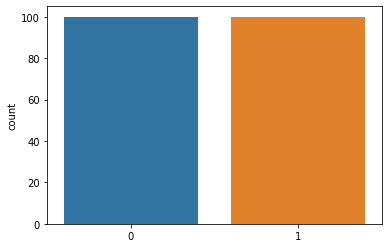

In [16]:
sns.countplot(y_test)

## Random Forest Model 

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf_model  = RandomForestClassifier()

In [18]:
rf_model = rf_model.fit(X_train, y_train)

In [20]:
y_rf_pred = rf_model.predict_proba(X_test)

In [28]:
y_rf_pred.shape

(200, 2)

In [31]:
print(y_rf_pred[:3])

[[0.89 0.11]
 [0.49 0.51]
 [0.44 0.56]]


In [32]:
roc_auc_score(y_test, y_rf_pred[:,1])

0.9641

## Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict_proba(X_test)
print(roc_auc_score(y_test, y_lr_pred[:,1]))


0.883


## Adaboost classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
y_ab_pred = ab_model.predict_proba(X_test)
roc_auc_score(y_test, y_ab_pred[:,1])

0.9363

In [41]:
type(y_ab_pred)

numpy.ndarray

In [46]:
print(pd.Series(y_ab_pred[:,1]))

<IPython.core.display.Javascript object>

0      0.328311
1      0.493837
2      0.497919
3      0.561573
4      0.461719
         ...   
195    0.571160
196    0.533878
197    0.495391
198    0.507548
199    0.544315
Length: 200, dtype: float64


## Find Threshold for all the model

In [87]:
model_list = [rf_model, lr_model, ab_model]

pred = []
for model in model_list:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
pred[0][0], pred[1][0], pred[2][0]

(0.11, 0.014762264829297584, 0.32831063021635526)

In [88]:
final_pred = pd.concat(pred, axis=1)
final_pred

<IPython.core.display.Javascript object>

,0,1,2
0,0.11,0.014762,0.328311
1,0.51,0.777300,0.493837
2,0.56,0.757598,0.497919
3,0.82,0.555928,0.561573
4,0.05,0.099284,0.461719
...,...,...,...
195,0.95,0.878225,0.571160
196,0.85,0.212424,0.533878
197,0.36,0.641356,0.495391
198,0.71,0.817494,0.507548


In [89]:
final_pred_mean = final_pred.mean(axis=1)
final_pred_mean

0      0.151024
1      0.593712
2      0.605172
3      0.645834
4      0.203668
         ...   
195    0.799795
196    0.532101
197    0.498916
198    0.678347
199    0.749575
Length: 200, dtype: float64

In [90]:
roc_auc_score(y_test, final_pred_mean)

0.944

In [62]:
for i in range(3):
    print(pred[i].mean())

0.5161
0.5204258402477719
0.5129666450929118


## Plot AUC

In [99]:
rf_fpr, rf_tpr, rf_th = roc_curve(y_test, y_rf_pred[:,1])
lr_fpr, lr_tpr, lr_th = roc_curve(y_test, y_lr_pred[:,1])
ab_fpr, ab_tpr, ab_th = roc_curve(y_test, y_ab_pred[:, 1])
ens_fpr, ens_tpr, ens_th = roc_curve(y_test, final_pred_mean)


In [100]:
print(rf_th[:5], lr_th[:5], ab_th[:5])

[2.   1.   0.99 0.98 0.96] [1.99899242 0.99899242 0.9182955  0.90332738 0.87332384] [1.74160285 0.74160285 0.56623127 0.56488828 0.51777171]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

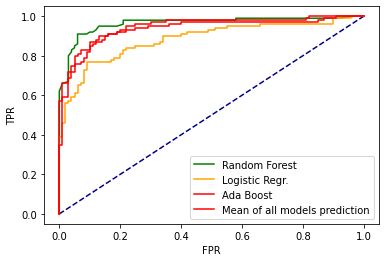

In [117]:
plt.plot([0,1], [0, 1], color='darkblue', linestyle='--')
plt.plot(rf_fpr, rf_tpr, color='green', label='Random Forest')
plt.plot(lr_fpr, lr_tpr, color='orange', label='Logistic Regr.')
plt.plot(ab_fpr, ab_tpr, color='red', label='Ada Boost')
plt.plot(ens_fpr, ens_tpr, color='red', label='Mean of all models prediction')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Find Accuracy Score

In [98]:
from sklearn.metrics import accuracy_score

In [101]:
fpr, tpr, th = roc_curve(y_test, final_pred_mean)

In [102]:
th

array([1.89893555, 0.89893555, 0.74574439, 0.74448569, 0.7384229 ,
       0.72614575, 0.67839672, 0.67142707, 0.64583354, 0.60773869,
       0.60608933, 0.60517224, 0.59371235, 0.58548089, 0.56443386,
       0.56030758, 0.54546118, 0.5325995 , 0.53210081, 0.52555067,
       0.52486417, 0.51041898, 0.50553582, 0.4989158 , 0.48966191,
       0.48020301, 0.47838501, 0.44010607, 0.43614828, 0.43174336,
       0.43134656, 0.42858304, 0.41837781, 0.40829288, 0.40678522,
       0.37727732, 0.37314992, 0.34376184, 0.34367549, 0.20227095,
       0.20224333, 0.20127651, 0.19890796, 0.11698535])

In [ ]:
ls_accurcy = []
for threshold in th:
    y_pred = np.where(final_pred_mean > threshold, 1, 0)
    ls_accurcy.append(accuracy_score(y_test, y_pred))
    

In [107]:
ls_accurcy

[0.005,
 0.005,
 0.285,
 0.29,
 0.3,
 0.31,
 0.375,
 0.385,
 0.405,
 0.415,
 0.42,
 0.425,
 0.435,
 0.44,
 0.455,
 0.46,
 0.475,
 0.48,
 0.485,
 0.49,
 0.495,
 0.505,
 0.51,
 0.515,
 0.525,
 0.53,
 0.535,
 0.55,
 0.555,
 0.56,
 0.565,
 0.575,
 0.585,
 0.6,
 0.605,
 0.63,
 0.635,
 0.66,
 0.665,
 0.895,
 0.9,
 0.905,
 0.91,
 1.0]

In [111]:
df_accuracy = pd.concat([pd.Series(th), pd.Series(ls_accurcy)], axis=1)
df_accuracy.columns = ['Threshold', 'Accuracy_Score']
df_accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Threshold,Accuracy_Score
0,1.898936,0.005
1,0.898936,0.005
2,0.745744,0.285
3,0.744486,0.290
4,0.738423,0.300
5,0.726146,0.310
6,0.678397,0.375
7,0.671427,0.385
8,0.645834,0.405
9,0.607739,0.415


In [112]:
type(df_accuracy)

pandas.core.frame.DataFrame

In [113]:
df_accuracy.sort_values(by='Accuracy_Score', ascending=False, inplace=True)

In [115]:
df_accuracy.head()

,Threshold,Accuracy_Score
43,0.116985,1.000
42,0.198908,0.910
41,0.201277,0.905
40,0.202243,0.900
39,0.202271,0.895
